# Import Libraries

In [1]:
#import pandas_datareader as pdr
#key="3702aa55d1a230198256d4009540e5be47270562"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout, Embedding
from numpy import array
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

# Create the different dataframes

In [2]:
#df = pdr.get_data_tiingo('TSLA', api_key=key)
#df.to_csv('TSLA.csv')
df=pd.read_csv('TSLA.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-04-20 00:00:00+00:00,302.51,309.1500,300.2300,306.510,6149352,60.502,61.8300,60.0460,61.302,30746760,0.0,1.0
1,TSLA,2017-04-21 00:00:00+00:00,305.60,306.4000,300.4200,302.000,4509756,61.120,61.2800,60.0840,60.400,22548780,0.0,1.0
2,TSLA,2017-04-24 00:00:00+00:00,308.03,310.5500,306.0215,309.220,5077561,61.606,62.1100,61.2043,61.844,25387805,0.0,1.0
3,TSLA,2017-04-25 00:00:00+00:00,313.79,313.9800,305.8600,308.000,6666406,62.758,62.7960,61.1720,61.600,33332030,0.0,1.0
4,TSLA,2017-04-26 00:00:00+00:00,310.17,314.5000,309.0000,312.370,4184186,62.034,62.9000,61.8000,62.474,20920930,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,TSLA,2022-04-11 00:00:00+00:00,975.93,1008.4681,974.6400,980.400,19785735,975.930,1008.4681,974.6400,980.400,19785735,0.0,1.0
1254,TSLA,2022-04-12 00:00:00+00:00,986.95,1021.1921,976.6001,997.640,21992032,986.950,1021.1921,976.6001,997.640,21992032,0.0,1.0
1255,TSLA,2022-04-13 00:00:00+00:00,1022.37,1026.2400,973.0970,981.075,18373737,1022.370,1026.2400,973.0970,981.075,18373737,0.0,1.0
1256,TSLA,2022-04-14 00:00:00+00:00,985.00,1012.7099,982.1900,999.290,19474135,985.000,1012.7099,982.1900,999.290,19474135,0.0,1.0


In [3]:
df1 = df.drop(range(1158,1258))
data=df.reset_index()['close']
data1=df1.reset_index()['close']

# Spliting the test and training data

In [4]:
data2 = np.array(data1).reshape(-1,1)
training_size=int(len(data2)*0.7)
test_size=len(data2)-training_size
train_data, test_data = data2[0:training_size,:], data2[training_size:len(data1),:1]

# Scale the data

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.fit_transform(test_data)
scaled_data = scaler.fit_transform(data2)

# Get the X and y train and test data

In [6]:
pred_days = 175

X_train = []
y_train = []

for i in range(pred_days, len(train_data)):  
    X_train.append(scaled_train_data[i-pred_days:i, 0] )
    y_train.append(scaled_train_data[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []

for i in range(pred_days, len(test_data)):  
    X_test.append(scaled_test_data[i-pred_days:i, 0] )
    y_test.append(scaled_test_data[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape data to fit the model

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print(X_train.shape), print(X_test.shape)

(635, 175, 1)
(173, 175, 1)


(None, None)

In [8]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(175,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_absolute_percentage_error'])

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100, batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 6s 303ms/step - loss: 0.0210 - mean_absolute_percentage_error: 195765.6562 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 13.7501
Epoch 2/100
10/10 [==============================] - 2s 193ms/step - loss: 0.0076 - mean_absolute_percentage_error: 70664.5781 - val_loss: 0.0032 - val_mean_absolute_percentage_error: 26.5056
Epoch 3/100
10/10 [==============================] - 2s 193ms/step - loss: 0.0042 - mean_absolute_percentage_error: 37566.4141 - val_loss: 0.0024 - val_mean_absolute_percentage_error: 14.8537
Epoch 4/100
10/10 [==============================] - 2s 202ms/step - loss: 0.0033 - mean_absolute_percentage_error: 77073.6797 - val_loss: 0.0014 - val_mean_absolute_percentage_error: 11.2522
Epoch 5/100
10/10 [==============================] - 2s 196ms/step - loss: 0.0031 - mean_absolute_percentage_error: 56173.3789 - val_loss: 0.0014 - val_mean_absolute_percentage_error: 11.9413
Epoch 6/100
10/10 [====================

10/10 [==============================] - 2s 173ms/step - loss: 9.6119e-04 - mean_absolute_percentage_error: 22086.0918 - val_loss: 8.7213e-04 - val_mean_absolute_percentage_error: 8.9353
Epoch 44/100
10/10 [==============================] - 2s 170ms/step - loss: 0.0010 - mean_absolute_percentage_error: 25603.4512 - val_loss: 8.3237e-04 - val_mean_absolute_percentage_error: 8.4348
Epoch 45/100
10/10 [==============================] - 2s 173ms/step - loss: 9.4362e-04 - mean_absolute_percentage_error: 21576.2500 - val_loss: 8.2189e-04 - val_mean_absolute_percentage_error: 8.4227
Epoch 46/100
10/10 [==============================] - 2s 175ms/step - loss: 9.7972e-04 - mean_absolute_percentage_error: 22786.8652 - val_loss: 8.0996e-04 - val_mean_absolute_percentage_error: 8.4219
Epoch 47/100
10/10 [==============================] - 2s 174ms/step - loss: 0.0012 - mean_absolute_percentage_error: 19191.9727 - val_loss: 7.9922e-04 - val_mean_absolute_percentage_error: 8.3446
Epoch 48/100
10/10 [=

10/10 [==============================] - 2s 170ms/step - loss: 6.3745e-04 - mean_absolute_percentage_error: 22203.4844 - val_loss: 5.2371e-04 - val_mean_absolute_percentage_error: 7.0270
Epoch 85/100
10/10 [==============================] - 2s 169ms/step - loss: 6.3447e-04 - mean_absolute_percentage_error: 16257.9561 - val_loss: 4.7441e-04 - val_mean_absolute_percentage_error: 7.2300
Epoch 86/100
10/10 [==============================] - 2s 183ms/step - loss: 6.5311e-04 - mean_absolute_percentage_error: 25270.5898 - val_loss: 6.1525e-04 - val_mean_absolute_percentage_error: 8.5956
Epoch 87/100
10/10 [==============================] - 2s 171ms/step - loss: 7.0429e-04 - mean_absolute_percentage_error: 14689.1699 - val_loss: 6.5950e-04 - val_mean_absolute_percentage_error: 9.7354
Epoch 88/100
10/10 [==============================] - 2s 168ms/step - loss: 6.3260e-04 - mean_absolute_percentage_error: 15217.2158 - val_loss: 4.3144e-04 - val_mean_absolute_percentage_error: 6.7957
Epoch 89/100


# Get predictions

In [10]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot the predictions

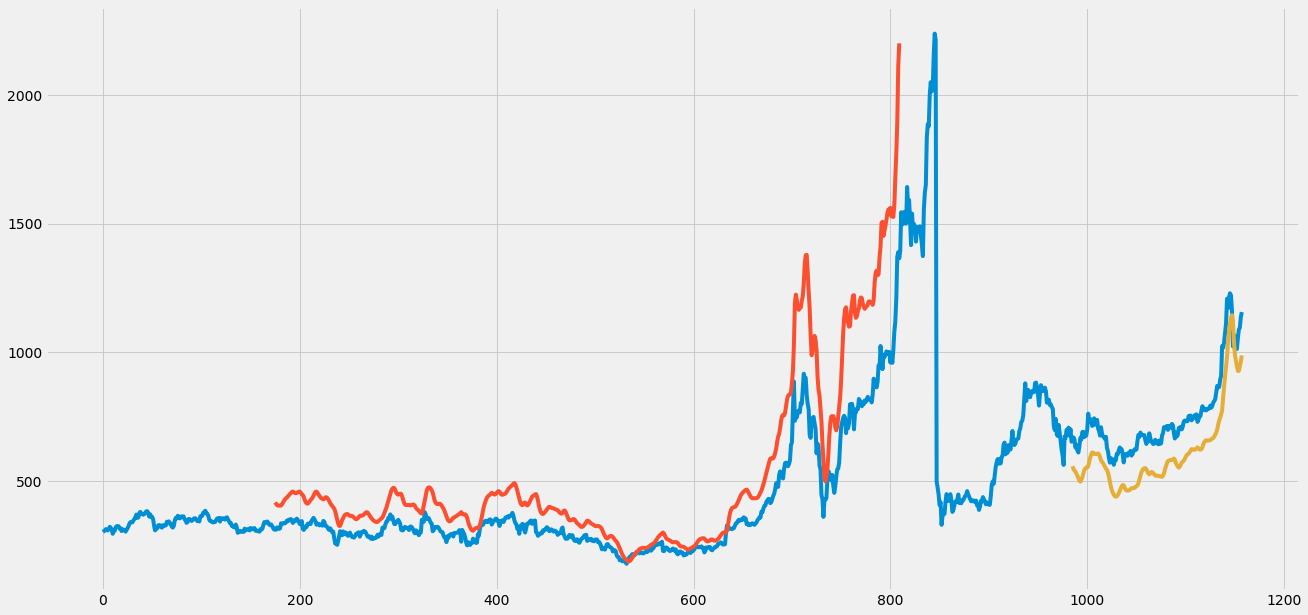

In [11]:
plt.figure(figsize=(20,10))

#plot predictions for train
days_predicted=175
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[days_predicted:len(train_predict)+days_predicted, :] = train_predict


#plot predictions for test
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(days_predicted*2):len(scaled_data), :] = test_predict


#show the plot for the original plus the predictions
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [12]:
len(scaled_test_data)

348

In [13]:
fut_inp = scaled_test_data[173:]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
fut_inp.shape

(1, 175)

# Loop to get the next 100 days

In [14]:
tmp_inp = tmp_inp[0].tolist()

lst_output=[]
n_steps=175
i=0
while(i<100):
    
    if(len(tmp_inp)>175):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

In [15]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,201)

In [16]:
len(data2)

1158

# Plot the next 100 days

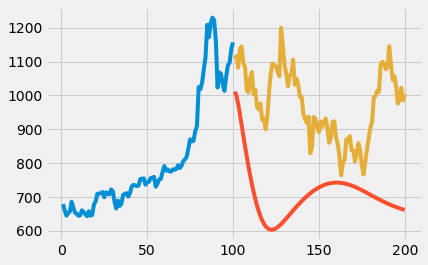

In [17]:
plt.plot(plot_new, scaler.inverse_transform(scaled_data[1058:]))
plt.plot(plot_pred, scaler.inverse_transform(lst_output))
plt.plot(plot_pred, (data[1158:]))

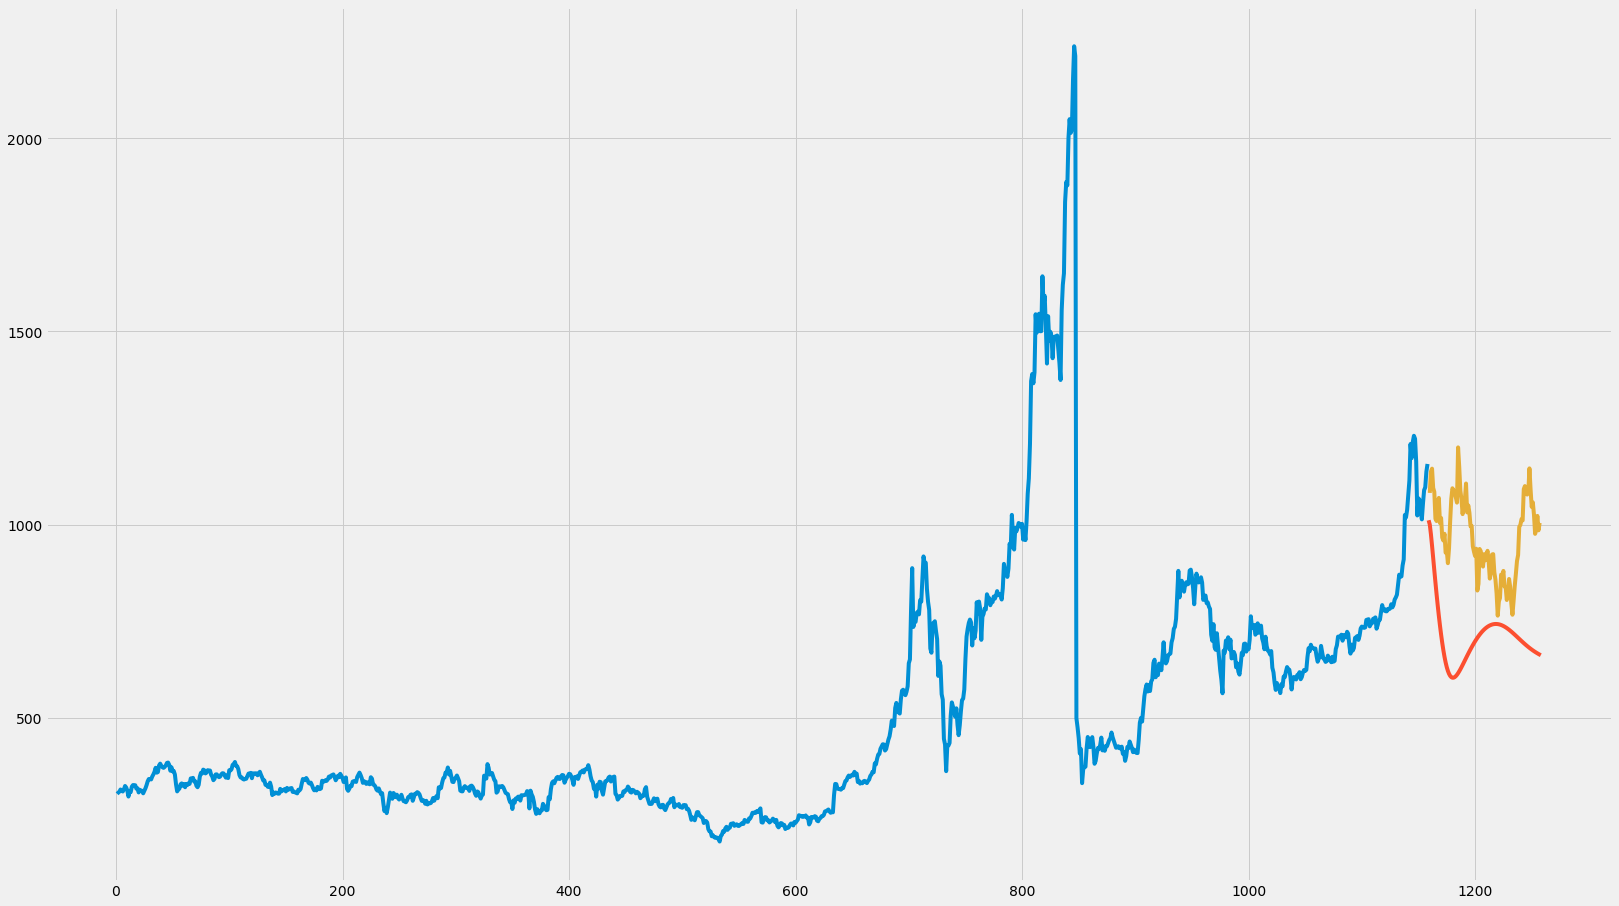

In [18]:
plot_new_1=np.arange(1,1159)
plot_pred_1=np.arange(1159,1259)
plt.figure(figsize=(25,15))
plt.plot(plot_new_1, scaler.inverse_transform(scaled_data[0:]))
plt.plot(plot_pred_1, scaler.inverse_transform(lst_output))
plt.plot(data[1160:])

In [19]:
#model.save('LSTM_V2.h5')